# Lessons Learned

Summary of findings:

*   For cleaning, there were duplicate entries that needed to be dropped. 
*   Got rid of first row to correct header that is needed
*   Renamed headers to allow for data clarification
*   



 
Observations made throughout analysis

*   There is a negative correlation for one repayment while the others are positive
*   List item



Future recommendations 

*   List item
*   List item



https://docs.google.com/document/d/1P8ZZobV-0hD8F5UG5MfshJ23CCUJOqJ0b42rMPdcxkQ/edit

In [2]:
from sqlalchemy import create_engine
!pip install PyMySQL
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip uninstall -y pandas-profiling
!pip install pandas-profiling
import pandas_profiling
from sklearn.tree import DecisionTreeClassifier
#!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip




connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

df = pd.read_sql('SELECT * FROM credit', con=connection)

#showing heading for the data frame
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: pandas-profiling 3.3.0
Uninstalling pandas-profiling-3.3.0:
  Successfully uninstalled pandas-profiling-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.3.0-py2.py3-none-any.whl (268 kB)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [3]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [5]:
df.describe

<bound method NDFrame.describe of 0    LIMIT_BAL     SEX    EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
1        20000  female   university        1  24     2     2    -1    -1   
2       120000  female   university        2  26    -1     2     0     0   
3        90000  female   university        2  34     0     0     0     0   
4        50000  female   university        1  37     0     0     0     0   
5        50000    male   university        1  57    -1     0    -1     0   
...        ...     ...          ...      ...  ..   ...   ...   ...   ...   
3665    220000  female   university        1  32     0     0     0     0   
3666     70000  female   university        2  34     1     2     2     2   
3667    120000    male   university        2  37    -1     2     0     0   
3668    180000  female   university        2  32     0     0     0     0   
3669     50000  female  high school        1  57     0     0     0     0   

0    PAY_5  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT

In [6]:
df.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [7]:
df.duplicated()
#duplicates are seen

1       False
2       False
3       False
4       False
5       False
        ...  
3665     True
3666     True
3667     True
3668     True
3669     True
Length: 3669, dtype: bool

In [8]:
cleanData = df.drop_duplicates()

In [9]:
clean = cleanData.drop([2398])

In [10]:
clean.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [11]:
clean.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2393,50000,male,high school,1,32,2,3,2,2,2,...,41526,42209,44960,1500,1600,1700,1500,3600,0,default
2394,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2395,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2396,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default
2397,200000,male,university,1,29,0,0,0,2,2,...,48367,49366,47539,2078,3900,1900,1904,12,5224,not default


In [12]:
#calling columns after the first two

for i in clean.columns:
    try:
        #for any number, try to change it to int
        clean [[i]] = clean [[i]].astype(float).astype(int)
        #if it cannot be changed, pass the object
    except:
        pass

In [13]:
clean.dtypes

0
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [14]:
clean.describe

<bound method NDFrame.describe of 0     LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
1         20000  female   university         1   24      2      2     -1   
2        120000  female   university         2   26     -1      2      0   
3         90000  female   university         2   34      0      0      0   
4         50000  female   university         1   37      0      0      0   
5         50000    male   university         1   57     -1      0     -1   
...         ...     ...          ...       ...  ...    ...    ...    ...   
2393      50000    male  high school         1   32      2      3      2   
2394      20000  female  high school         2   49      0      0      2   
2395     130000  female   university         2   24      1     -2     -1   
2396     110000  female  high school         1   27      0      0      0   
2397     200000    male   university         1   29      0      0      0   

0     PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_A

In [15]:
print(clean.isnull().sum())

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [16]:
credit = clean

In [17]:
credit.columns= ['CreditLimit', 'Sex', 'Education', 'Marriage', 'Age', 'SepRepay', 'AugRepay', 'JulRepay', 'JunRepay', 'MayRepay', 'AprRepay', 'SepBillAmt', 'AugBillAmt', 'JulBillAmt', 'JunBillAmt', 'MayBillAmt', 'AprBillAmt', 'SepPmt', 'AugPmt', 'JulPmt', 'JunPmt', 'MayPmt', 'AprPmt', 'Default_Status']

In [18]:
credit.head()

,CreditLimit,Sex,Education,Marriage,Age,SepRepay,AugRepay,JulRepay,JunRepay,MayRepay,...,JunBillAmt,MayBillAmt,AprBillAmt,SepPmt,AugPmt,JulPmt,JunPmt,MayPmt,AprPmt,Default_Status
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [19]:
pandas_profiling.ProfileReport(credit)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CreditLimit     2396 non-null   int64 
 1   Sex             2396 non-null   object
 2   Education       2396 non-null   object
 3   Marriage        2396 non-null   int64 
 4   Age             2396 non-null   int64 
 5   SepRepay        2396 non-null   int64 
 6   AugRepay        2396 non-null   int64 
 7   JulRepay        2396 non-null   int64 
 8   JunRepay        2396 non-null   int64 
 9   MayRepay        2396 non-null   int64 
 10  AprRepay        2396 non-null   int64 
 11  SepBillAmt      2396 non-null   int64 
 12  AugBillAmt      2396 non-null   int64 
 13  JulBillAmt      2396 non-null   int64 
 14  JunBillAmt      2396 non-null   int64 
 15  MayBillAmt      2396 non-null   int64 
 16  AprBillAmt      2396 non-null   int64 
 17  SepPmt          2396 non-null   int64 
 18  AugPmt  

In [21]:
credit.dtypes

CreditLimit        int64
Sex               object
Education         object
Marriage           int64
Age                int64
SepRepay           int64
AugRepay           int64
JulRepay           int64
JunRepay           int64
MayRepay           int64
AprRepay           int64
SepBillAmt         int64
AugBillAmt         int64
JulBillAmt         int64
JunBillAmt         int64
MayBillAmt         int64
AprBillAmt         int64
SepPmt             int64
AugPmt             int64
JulPmt             int64
JunPmt             int64
MayPmt             int64
AprPmt             int64
Default_Status    object
dtype: object

In [22]:
credit = pd.get_dummies(credit)

In [23]:
credit.dtypes

CreditLimit                   int64
Marriage                      int64
Age                           int64
SepRepay                      int64
AugRepay                      int64
JulRepay                      int64
JunRepay                      int64
MayRepay                      int64
AprRepay                      int64
SepBillAmt                    int64
AugBillAmt                    int64
JulBillAmt                    int64
JunBillAmt                    int64
MayBillAmt                    int64
AprBillAmt                    int64
SepPmt                        int64
AugPmt                        int64
JulPmt                        int64
JunPmt                        int64
MayPmt                        int64
AprPmt                        int64
Sex_female                    uint8
Sex_male                      uint8
Education_graduate school     uint8
Education_high school         uint8
Education_other               uint8
Education_university          uint8
Default_Status_default      

In [24]:
header = credit.dtypes.index
print(header)

Index(['CreditLimit', 'Marriage', 'Age', 'SepRepay', 'AugRepay', 'JulRepay',
       'JunRepay', 'MayRepay', 'AprRepay', 'SepBillAmt', 'AugBillAmt',
       'JulBillAmt', 'JunBillAmt', 'MayBillAmt', 'AprBillAmt', 'SepPmt',
       'AugPmt', 'JulPmt', 'JunPmt', 'MayPmt', 'AprPmt', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default'],
      dtype='object')


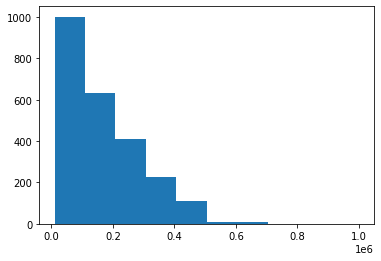

In [25]:
plt.hist(credit['CreditLimit'])
plt.show()

(array([1.882e+03, 4.940e+02, 1.900e+01, 1.000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

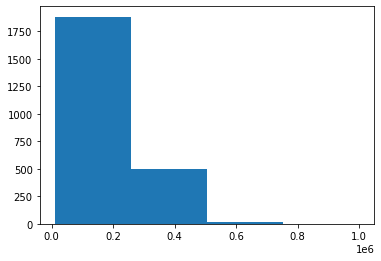

In [26]:
plt.hist(credit['CreditLimit'], bins=4)

In [27]:
# Mean of creditLimit per age
credit.groupby('Age')['CreditLimit'].mean()

Age
21     18000.000000
22     35344.827586
23     64155.844156
24     70505.050505
25    105632.183908
26    128679.245283
27    151250.000000
28    169462.365591
29    179565.217391
30    174473.684211
31    194895.833333
32    189797.979798
33    185057.471264
34    197395.833333
35    194269.662921
36    207444.444444
37    187529.411765
38    220273.972603
39    201492.537313
40    188260.869565
41    208923.076923
42    208166.666667
43    193148.148148
44    166800.000000
45    230303.030303
46    158974.358974
47    185789.473684
48    128378.378378
49    149318.181818
50    188000.000000
51    135925.925926
52    159200.000000
53    199677.419355
54    159583.333333
55    124375.000000
56    172941.176471
57     89230.769231
58    207000.000000
59     80000.000000
60    198000.000000
61    140000.000000
62    155000.000000
63    203333.333333
64    310000.000000
65    220000.000000
66    255000.000000
67    230000.000000
70    200000.000000
71    250000.000000
72     50000.000

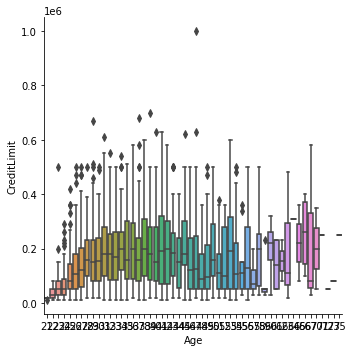

In [30]:
# box plot showing the plot of amount for each count of items purchased
sns.catplot(x='Age', y='CreditLimit', data=credit, kind='box')